In [1]:
using Pkg

# Pkg.add(url="https://github.com/mppmu/BoostFractor.jl.git")
Pkg.add(url="https://github.com/bergermann/Dragoon.jl.git")
# Pkg.update()

    Updating git-repo `https://github.com/bergermann/Dragoon.jl.git`

   Resolving package versions...


    Updating `C:\Users\domin\.julia\environments\v1.9\Project.toml`
  [2528b1d8] ~ Dragoon v0.0.0 `https://github.com/bergermann/Dragoon.jl.git#main` ⇒ v0.0.0 `https://github.com/bergermann/Dragoon.jl.git#main`
    Updating `C:\Users\domin\.julia\environments\v1.9\Manifest.toml`
  [2528b1d8] ~ Dragoon v0.0.0 `https://github.com/bergermann/Dragoon.jl.git#main` ⇒ v0.0.0 `https://github.com/bergermann/Dragoon.jl.git#main`

Precompiling project...


  ✓ Dragoon
  1 dependency successfully precompiled in 3 seconds. 153 already precompiled.


In [2]:
using Dragoon
using Plots
# using Dates

In [3]:
ref0 = [
      0.6037533702979441 - 0.7971711659699691im,
    -0.49152420239804373 - 0.8708639150045079im,
     -0.9446107215621984 - 0.3281929077687685im,
     -0.9846694945053195 + 0.1744304634822827im,
     -0.8136139156426136 + 0.5814055351238824im,
     -0.4751750303984411 + 0.8798912946982941im,
    0.007749561940184724 + 0.9999699716940137im,
      0.5325698378687111 + 0.8463860630896989im,
      0.9042152260421181 + 0.4270770714913185im,
      0.9965552817110883 - 0.08293111897068542im,
];

ref1 = [
  0.9240607675676515 - 0.38224559885263165im,
  0.7380980822551304 - 0.674693427395952im,
  0.462948064022487 - 0.8863854071552547im,
  0.14786245633322903 - 0.9890079342488161im,
  -0.15586000240126052 - 0.9877791553031501im,
  -0.41490614421034666 - 0.9098642159665684im,
  -0.617404400711767 - 0.7866459216074747im,
  -0.7658156811116661 - 0.6430601391498648im,
  -0.8687939779605591 - 0.49517373098685186im,
  -0.9360561794775265 - 0.3518505774642497im,
  -0.9761192037376331 - 0.21723558662114203im,
  -0.9956895298891584 - 0.09274890872183986im,
  -0.9997664170139217 + 0.02161276037728511im,
  -0.9919648735330898 + 0.12651359482877816im,
  -0.9748503346892108 + 0.2228605504711954im,
  -0.9502174864493367 + 0.3115874330679862im,
  -0.9193032370696224 + 0.393549943861387im,
  -0.8829429833546631 + 0.46948023189991367im,
  -0.8416837189379979 + 0.5399708485415708im,
  -0.7958656259972035 + 0.6054732903737947im,
  -0.7456820601606868 + 0.6663019324259252im,
  -0.6912243153190141 + 0.7226402603728616im,
  -0.6325172274726643 + 0.7745462910312649im,
  -0.5695479277801538 + 0.8219581242139662im,
  -0.5022919227600631 + 0.8646981116725166im,
  -0.4307376970992456 + 0.9024771666350553im,
  -0.35491058222663224 + 0.9349002506275896im,
  -0.2748980884521972 + 0.9614733698679944im,
  -0.19087567409544032 + 0.9816142200674294im,
  -0.10313357313905225 + 0.9946675153495173im,
  -0.012103106793501572 + 0.9999267547205412im,
  0.08161873838943179 + 0.9966636250730342im,
  0.1772493286384882 + 0.9841659796483582im,
  0.27380786206107666 + 0.9617844117439002im,
  0.3701142439384575 + 0.9289862466333114im,
  0.46480279904208954 + 0.8854142296138187im,
  0.5563540269667009 + 0.8309453632327204im,
  0.6431457015941184 + 0.7657438256499466im,
  0.7235225589439993 + 0.6903007364179202im,
  0.7958805407946918 + 0.6054536850861058im,
  0.8587587180131229 + 0.512380195008022im,
  0.9109293743169278 + 0.4125623286323685im,
  0.9514758477257652 + 0.307723432962967im,
  0.9798484268083656 + 0.1997424854185147im,
  0.9958914606454912 + 0.09055494803379414im,
  0.9998389086057622 - 0.017948728033846926im,
  0.992280221622198 - 0.12401597388001956im,
  0.9741024265108893 - 0.2261071928657065im,
  0.946416901645635 - 0.32294743888049116im,
  0.9104801519376988 - 0.41355276921755146im,
]
;

50-element Vector{ComplexF64}:
   0.9240607675676515 - 0.38224559885263165im
   0.7380980822551304 - 0.674693427395952im
    0.462948064022487 - 0.8863854071552547im
  0.14786245633322903 - 0.9890079342488161im
 -0.15586000240126052 - 0.9877791553031501im
 -0.41490614421034666 - 0.9098642159665684im
   -0.617404400711767 - 0.7866459216074747im
  -0.7658156811116661 - 0.6430601391498648im
  -0.8687939779605591 - 0.49517373098685186im
  -0.9360561794775265 - 0.3518505774642497im
                      ⋮
   0.9109293743169278 + 0.4125623286323685im
   0.9514758477257652 + 0.307723432962967im
   0.9798484268083656 + 0.1997424854185147im
   0.9958914606454912 + 0.09055494803379414im
   0.9998389086057622 - 0.017948728033846926im
    0.992280221622198 - 0.12401597388001956im
   0.9741024265108893 - 0.2261071928657065im
    0.946416901645635 - 0.32294743888049116im
   0.9104801519376988 - 0.41355276921755146im

In [4]:
n = 20

initdist = findpeak(22.025e9,n)

freqs = genFreqs(22.025e9,50e6; length=50)
freqsplot = genFreqs(22.025e9,150e6; length=1000)

booster = AnalyticalBooster(initdist)

hist = initHist(booster,10000,freqs,ObjRef1dSquare(ref1))
;

Objective Value: 105.7, Timestamp: 0000-01-01T00:00:00


In [5]:
T = collect(range(1; length=100001,stop=0))

trace = simulatedAnnealing(booster,hist,freqs,
            T,100e-6,
            ObjRef1dSquare(ref1),
            UnstuckDont;
            maxiter=Int(1e6),
            showtrace=true,
            showevery=10000,
            unstuckisiter=true,
            traceevery=1,
            resettimer=true)
;

Iter: 10000, timestamp: 50 minutes, 47 seconds
Iter finished. Objective value current:  0.559
               Objective value solution: 0.054
               Temperature:              0.9



Iter: 20000, timestamp: 1 hour, 42 minutes, 52 seconds
Iter finished. Objective value current:  1.623
               Objective value solution: 0.031
               Temperature:              0.8



Iter: 30000, timestamp: 2 hours, 34 minutes, 55 seconds
Iter finished. Objective value current:  1.513
               Objective value solution: 0.031
               Temperature:              0.7



Iter: 40000, timestamp: 3 hours, 27 minutes, 6 seconds
Iter finished. Objective value current:  1.327
               Objective value solution: 0.031
               Temperature:              0.6



Iter: 50000, timestamp: 4 hours, 19 minutes, 57 seconds
Iter finished. Objective value current:  0.159
               Objective value solution: 0.016
               Temperature:              0.5



Iter: 60000, timestamp: 5 hours, 13 minutes, 17 seconds
Iter finished. Objective value current:  0.731
               Objective value solution: 0.016
               Temperature:              0.4



Iter: 70000, timestamp: 6 hours, 6 minutes, 32 seconds
Iter finished. Objective value current:  0.372
               Objective value solution: 0.016
               Temperature:              0.3



Iter: 80000, timestamp: 7 hours, 3 seconds
Iter finished. Objective value current:  0.618
               Objective value solution: 0.016
               Temperature:              0.2



Iter: 90000, timestamp: 7 hours, 53 minutes, 49 seconds
Iter finished. Objective value current:  0.366
               Objective value solution: 0.016
               Temperature:              0.1



Iter: 100000, timestamp: 8 hours, 47 minutes, 19 seconds
Iter finished. Objective value current:  0.067
               Objective value solution: 0.016
               Temperature:              0.0

Terminated. 100001 Iterations.
Final objective value: 0.016
Elapsed movement time:  8 hours, 47 minutes, 24 seconds
Summed movement time:   3 days, 6 hours, 39 minutes, 34 seconds
Elapsed computing time: 38 seconds, 189 milliseconds


In [ ]:
analyse(hist,trace,freqsplot; freqs=freqs,div=20,scale=1e9,ylim=[-0.05e4,3e4])

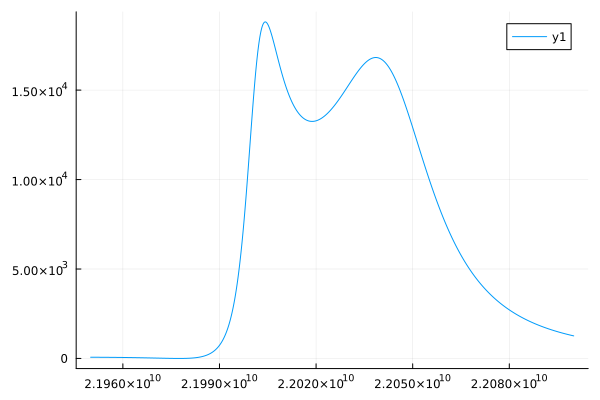

In [6]:
plot(freqsplot,getBoost1d(booster,freqsplot))

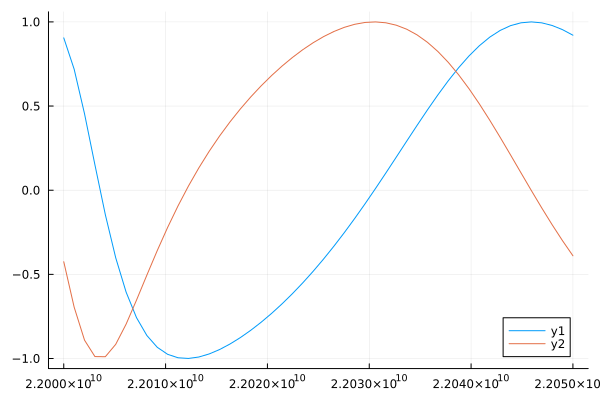

In [7]:
plot(freqs,real(Dragoon.getRef1d(booster,freqs)))
plot!(freqs,imag(Dragoon.getRef1d(booster,freqs)))

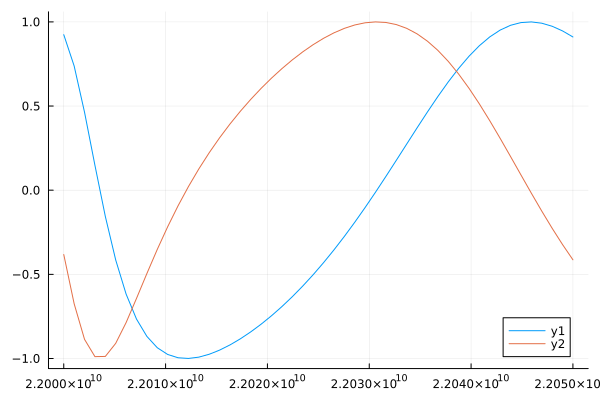

In [8]:
plot(freqs,real(ref1))
plot!(freqs,imag(ref1))

In [9]:
ref0

10-element Vector{ComplexF64}:
   0.6037533702979441 - 0.7971711659699691im
 -0.49152420239804373 - 0.8708639150045079im
  -0.9446107215621984 - 0.3281929077687685im
  -0.9846694945053195 + 0.1744304634822827im
  -0.8136139156426136 + 0.5814055351238824im
  -0.4751750303984411 + 0.8798912946982941im
 0.007749561940184724 + 0.9999699716940137im
   0.5325698378687111 + 0.8463860630896989im
   0.9042152260421181 + 0.4270770714913185im
   0.9965552817110883 - 0.08293111897068542im

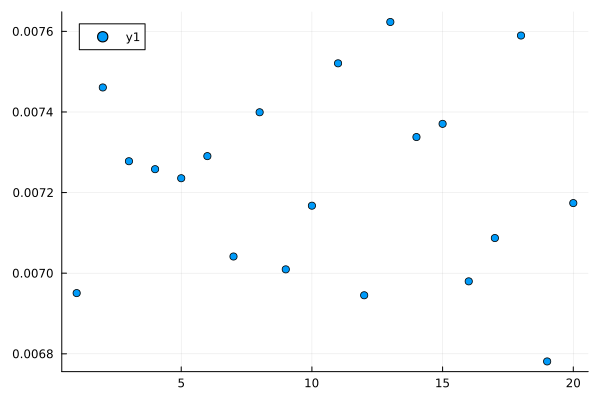

In [12]:
scatter(pos2dist(booster.pos))